# Dataset Analysis

In [ ]:
!pip install numpy
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 6.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630202 sha256=8c1e1b87d6412b04979cb5b13cbaf168faf5a6c6fc8073f493fb80480dccaa08
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import surprise
from surprise import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.sparse import csr_matrix
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBasic,SVD
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
import sklearn
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/ml-20m/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ml-20m/ratings.csv')
tags= pd.read_csv('/content/drive/MyDrive/ml-20m/tags.csv')
merge= pd.merge(left=movies, right=tags, on='movieId')
data = pd.merge(left=movies, right=ratings, on='movieId')
reader = Reader(rating_scale=(0.5, 5.0))

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/ml-20m/movies.csv')

In [ ]:
movies_data =ratings.iloc[:50000,:]
merge=Dataset.load_from_df(data[['userId', 'movieId','rating']], reader)

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


we can you use three things for content based Recommndation sysytem 1:title
2: genres 3:tag

# Explore the dataset and summarize the item descriptor fields in the dataset assigned to
you. Discuss which fields can be used as features for a content-based recommendation
system. Explore PCA or sklearn’s feature selection for dimensionality reduction of the
item-feature matrix.

In [ ]:
bag_of_tag=np.array(tags['tag'])

In [ ]:
bag_of_tag

array(['Mark Waters', 'dark hero', 'dark hero', ..., 'quirky', 'sad',
       'rise to power'], dtype=object)

In [ ]:
tag_by_item= tags['tag'].groupby([tags.movieId]).apply(list).reset_index()


In [ ]:
tag_by_item

,movieId,tag
0,1,"[Watched, computer animation, Disney animated ..."
1,2,"[time travel, adapted from:book, board game, c..."
2,3,"[old people that is actually funny, sequel fev..."
3,4,"[chick flick, revenge, characters, chick flick..."
4,5,"[Diane Keaton, family, sequel, Steve Martin, w..."
...,...,...
19540,131054,[dinosaurs]
19541,131082,"[documentary, Yoshitomo Nara]"
19542,131164,[Vietnam War]
19543,131170,[alternate reality]


In [ ]:
tags['movieId'].nunique()

19545

we can't do using tags beacase not all the movies has tags so now we go with genres

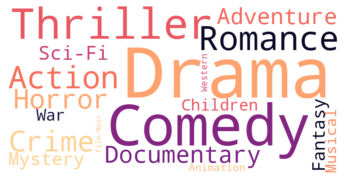

In [ ]:
movie_genres = []

for genre in movies['genres']:
    for movie in genre.split('|'):
        movie_genres.append(movie)

genre_counts = pd.Series(movie_genres).value_counts()[:18]

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='magma')
genres_cloud.generate_from_frequencies(genre_counts)

plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

tfvec = TfidfVectorizer()
tdf= tfvec.fit_transform(movies['genres'])
frame = pd.DataFrame(tdf.toarray(), columns = tfvec.get_feature_names_out())

In [ ]:
frame

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,0.0,0.419151,0.518269,0.505742,0.264175,0.0,0.0,0.000000,0.479736,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.515311,0.000000,0.621768,0.000000,0.0,0.0,0.000000,0.589796,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.602583,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.798056,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.544541,0.0,0.0,0.428212,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.721186,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
27274,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
27275,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
27276,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.57735,0.0,0.0,0.57735,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
pca = PCA(n_components=10)
item_feature = pca.fit_transform(frame)

used pca for dimentinality reduction of my feature and item matrix.before it is 24 and I reduced it to 10

In [ ]:
item_feature.shape

(27278, 10)

In [ ]:
item_feature

array([[-0.32538948, -0.02861749, -0.04163044, ..., -0.24453585,
         0.55667156, -0.22833925],
       [-0.20476974, -0.23400497, -0.04818819, ..., -0.27085052,
         0.54442445, -0.2449278 ],
       [-0.41036591,  0.46057548,  0.04360495, ...,  0.02846628,
        -0.05368739, -0.01592796],
       ...,
       [-0.18484991, -0.2429951 , -0.05749319, ..., -0.24646589,
         0.34779506, -0.21413495],
       [-0.14583977, -0.18496202,  0.0104174 , ..., -0.02942382,
         0.09027932,  0.08986013],
       [-0.23262697, -0.32617081, -0.17522198, ..., -0.34574337,
         0.14707728, -0.25876066]])

# Content-based (Memory-based) Recommendation

Construct the item feature matrix using (i) 1-hot keywords, (ii) tf-idf weighting scheme,
and (iii) neural embedding such as word2Vec or BERT. Use the features identified in the
previous question. You can use sklearn’s TF-IDF vectorizer. Using each of the above
three item feature matrix, compute top-N recommendations for each user and show the
overall relevance score (i.e. precision) for N = {5, 10, 15, 20, 25}.

(ii) tf-idf weighting scheme

item_feature

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies=movies.drop(['title'],axis=1)
movies=movies.drop_duplicates(subset='movieId',  keep = "last")
movies=movies.set_index(['movieId'])


In [ ]:
tfvec = TfidfVectorizer()
tdf= tfvec.fit_transform(movies['genres'])
item_feature = pd.DataFrame(tdf.toarray(), columns = tfvec.get_feature_names_out())

In [ ]:
item_feature

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,0.0,0.419151,0.518269,0.505742,0.264175,0.0,0.0,0.000000,0.479736,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.515311,0.000000,0.621768,0.000000,0.0,0.0,0.000000,0.589796,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.602583,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.798056,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.544541,0.0,0.0,0.428212,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.721186,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
27274,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
27275,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
27276,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.57735,0.0,0.0,0.57735,0.0,0.000000,0.0,0.0,0.0,0.0


user_feature

In [ ]:
data=data.drop(['movieId','title','rating','timestamp'],axis=1)

In [ ]:
data=data.drop_duplicates(subset='userId', keep = "last")
data=data.set_index(['userId'])

In [ ]:
data

,genres
userId,
63203,Documentary
121731,Drama|Romance
107996,Drama
83757,Crime|Drama
60738,Adventure|Drama|Sci-Fi
...,...
134701,Comedy
79570,Comedy
28906,Adventure


In [ ]:
tfvec = TfidfVectorizer()
tdf= tfvec.fit_transform(data['genres'])
user_feature = pd.DataFrame(tdf.toarray(), columns = tfvec.get_feature_names_out())

In [ ]:
user_feature

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,no,noir,romance,sci,thriller,war,western
0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.577949,0.000000,0.000000,...,0.00000,0.0,0.0,0.00000,0.0,0.816073,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.838438,0.0,0.544996,0.000000,0.000000,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.484904,0.0,0.0,0.0,0.000000,0.0,0.380536,0.000000,0.556804,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.556804,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138488,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
138489,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
138490,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
138491,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.57735,0.0,0.0,0.57735,0.0,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
with open("/content/drive/MyDrive/item_feaure.pickle","wb") as f:
  pickle.dump(item_feature,f)

In [ ]:
with open("/content/drive/MyDrive/user_feaure.pickle","wb") as f:
  pickle.dump(user_feature,f)

one hot

In [ ]:
movies

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy
...,...,...
27273,131254,Comedy
27274,131256,Comedy
27275,131258,Adventure
27276,131260,(no genres listed)


In [ ]:
movies['genres'] = movies.genres.str.split('|')
m = movies.copy()
for index, row in movies.iterrows():
    for genre in row['genres']:
        m.at[index, genre] = 1
m = m.fillna(0)
m.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),[Comedy],0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
m=m.drop(['genres'],axis=1)

In [ ]:
data['genres'] = data.genres.str.split('|')
j = data.copy()
for index, row in data.iterrows():
    for genre in row['genres']:
        j.at[index, genre] = 1
j= j.fillna(0)
j.head()

,genres,Documentary,Drama,Romance,Crime,Adventure,Sci-Fi,Comedy,Action,Thriller,...,Western,Children,Fantasy,Animation,Musical,Horror,IMAX,Mystery,Film-Noir,(no genres listed)
userId,,,,,,,,,,,,,,,,,,,,,
63203,[Documentary],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121731,"[Drama, Romance]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107996,[Drama],0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83757,"[Crime, Drama]",0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60738,"[Adventure, Drama, Sci-Fi]",0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
j=j.drop(['genres'],axis=1)

In [ ]:
with open("/content/drive/MyDrive/one-hot_m.pickle","wb") as f:
  pickle.dump(m,f)
with open("/content/drive/MyDrive/one-hot_j.pickle","wb") as f:
  pickle.dump(j,f)

In [ ]:
first = m.iloc[:500,:]
second = j.iloc[:500,:]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(first,second)

In [ ]:
j=sorted(sim[0],reverse=True)

In [ ]:
a = np.where(sim == j[0])

In [ ]:
for i in range(10):
   print(movies[movies.index ==a[1][-i]]['title'])

1    Jumanji (1995)
Name: title, dtype: object
20    Get Shorty (1995)
Name: title, dtype: object
20    Get Shorty (1995)
Name: title, dtype: object
20    Get Shorty (1995)
Name: title, dtype: object
20    Get Shorty (1995)
Name: title, dtype: object
100    Mr. Wrong (1996)
Name: title, dtype: object
99    Bottle Rocket (1996)
Name: title, dtype: object
98    City Hall (1996)
Name: title, dtype: object
97    Heidi Fleiss: Hollywood Madam (1995)
Name: title, dtype: object
96    Shopping (1994)
Name: title, dtype: object


(iii) neural embedding such as word2Vec or BERT.

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

In [ ]:
embeding = model.encode(movies['genres'].tolist())

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(embeding)

In [ ]:
mov = 'Toy Story (1995)'

In [ ]:
RecSys = sorted(list(enumerate(sim[movies.index[movies.title == mov]])),key = lambda x:x[1],reverse = True)

In [ ]:
array=RecSys[0][1]

In [ ]:
a = np.where(sim == array[0])

In [ ]:
for i in range(10):
   print(movies[movies.index ==a[1][-i]]['title'])

0    Toy Story (1995)
Name: title, dtype: object
27270    Brother Bear 2 (2006)
Name: title, dtype: object
24849    The Magic Crystal (2011)
Name: title, dtype: object
24460    Toy Story Toons: Small Fry (2011)
Name: title, dtype: object
24458    Toy Story Toons: Hawaiian Vacation (2011)
Name: title, dtype: object
24156    Boxtrolls, The (2014)
Name: title, dtype: object
24092    Aladdin (1992)
Name: title, dtype: object
21355    Turbo (2013)
Name: title, dtype: object
18274    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object
10987    Wild, The (2006)
Name: title, dtype: object


# Content-based (Model-based) Recommendation

(i) Naive Bayes,

In [ ]:
sentiment = {0.5:'dislike',1:'dislike',1.5:'dislike',2:'dislike',2.5:'dislike',3:'dislike',3.5:'like',4:'like',4.5:'like',5:'like'}
data["senti"]=data['rating'].map(sentiment)

In [ ]:
data=data.iloc[:50000,:]

In [ ]:
X=data.iloc[:,:-2].values
Y = data.iloc[:,-1:].values

In [ ]:
Y

,senti
0,like
1,like
2,like
3,like
4,like
...,...
49995,dislike
49996,dislike
49997,dislike
49998,dislike


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1]= le.fit_transform(X[:,1])
Y= le.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
 y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
ac

0.8216

# (ii) Logistic Regression,

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression

# Building the logistic model
Logmod = LogisticRegression()
Logmod.fit(X_train, y_train)

# Creating x_var data for new user

y_pred = Logmod.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
ac

1.0

# k-NN

In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [ ]:
def make_recommendations(self, fav_movie, n_recommendations):
    movie_user_mat_sparse, hashmap = self._prep_data()
    raw_recommends = self._inference(
        self.model, movie_user_mat_sparse, hashmap,
        fav_movie, n_recommendations)
    reverse_hashmap = {v: k for k, v in hashmap.items()}
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance '
              'of {2}'.format(i+1, reverse_hashmap[idx], dist))

In [ ]:
j=make_recommendations("Toy Story",1)